# GoingDeeper 01. ResNet

## ÌîÑÎ°úÏ†ùÌä∏: ResNet Ablation Study

### lubric

1. ResNet-34, ResNet-50 Î™®Îç∏ Íµ¨ÌòÑÏù¥ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÏßÑÌñâÎêòÏóàÎäîÍ∞Ä? Î∏îÎ°ùÌï®Ïàò Íµ¨ÌòÑÏù¥ Ï†úÎåÄÎ°ú ÏßÑÌñâÎêòÏóàÏúºÎ©∞ Íµ¨ÌòÑÌïú Î™®Îç∏Ïùò summaryÍ∞Ä ÏòàÏÉÅÎêú ÌòïÌÉúÎ°ú Ï∂úÎ†•ÎêòÏóàÎã§.
2. Íµ¨ÌòÑÌïú ResNet Î™®Îç∏ÏùÑ ÌôúÏö©ÌïòÏó¨ Image Classification Î™®Îç∏ ÌõàÎ†®Ïù¥ Í∞ÄÎä•ÌïúÍ∞Ä?cats_vs_dogs Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÌïôÏäµÏãú Î™á epochÎèôÏïà ÏïàÏ†ïÏ†ÅÏúºÎ°ú loss Í∞êÏÜåÍ∞Ä ÏßÑÌñâ ÌôïÏù∏ÎêòÏóàÎã§.
3. Ablation Study Í≤∞Í≥ºÍ∞Ä Î∞îÎ•∏ Ìè¨Îß∑ÏúºÎ°ú Ï†úÏ∂úÎêòÏóàÎäîÍ∞Ä? ResNet-34, ResNet-50 Í∞ÅÍ∞Å plainÎ™®Îç∏Í≥º residualÎ™®Îç∏ÏùÑ ÎèôÏùºÌïú epochÎßåÌÅº ÌïôÏäµÏãúÏº∞ÏùÑ ÎïåÏùò validation accuracy Í∏∞Ï§ÄÏúºÎ°ú Ablation Study Í≤∞Í≥ºÌëúÍ∞Ä ÏûëÏÑ±ÎêòÏóàÎã§.

### ÌïôÏäµ Î™©Ìëú

- ÏßÅÏ†ë ResNet Íµ¨ÌòÑÌïòÍ∏∞
- Î™®Îç∏ÏùÑ configÏóê Îî∞ÎùºÏÑú Î≥ÄÍ≤Ω Í∞ÄÎä•ÌïòÎèÑÎ°ù ÎßåÎì§Í∏∞
- ÏßÅÏ†ë Ïã§ÌóòÌï¥ÏÑú ÏÑ±Îä• ÎπÑÍµêÌïòÍ∏∞

### üö©keyword

‚úî CNN, ResNet, build

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

In [ ]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.8.0
1.21.5
2.8.0
1.21.5


In [ ]:
# TensorflowÍ∞Ä ÌôúÏö©Ìï† GPUÍ∞Ä Ïû•Ï∞©ÎêòÏñ¥ ÏûàÎäîÏßÄ ÌôïÏù∏Ìï¥ Î¥ÖÎãàÎã§.
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

**data load**

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'], # test set ÏóÜÏñ¥ÏÑú train ÎÇòÎàÑÍ∏∞
    as_supervised=True,
    shuffle_files=True,
    with_info=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteYS96LW/cats_vs_dogs-train.tfrecord


  0%|          | 0/23262 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [ ]:
# Tensorflow Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î°úÎìúÌïòÎ©¥ Íº≠ feature Ï†ïÎ≥¥Î•º ÌôïÏù∏Ìï¥ Î≥¥ÏÑ∏Ïöî. 
print(ds_info.features)

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'image/filename': Text(shape=(), dtype=tf.string),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
})
FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'image/filename': Text(shape=(), dtype=tf.string),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
})


In [ ]:
# Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàòÎèÑ ÌôïÏù∏Ìï¥ Î¥ÖÏãúÎã§. 
print(tf.data.experimental.cardinality(ds_train))
print(tf.data.experimental.cardinality(ds_test))

tf.Tensor(18610, shape=(), dtype=int64)
tf.Tensor(4652, shape=(), dtype=int64)
tf.Tensor(18610, shape=(), dtype=int64)
tf.Tensor(4652, shape=(), dtype=int64)


In [ ]:
ds_info.features["label"].num_classes

2

2

In [ ]:
ds_info.features["label"].names

['cat', 'dog']

['cat', 'dog']

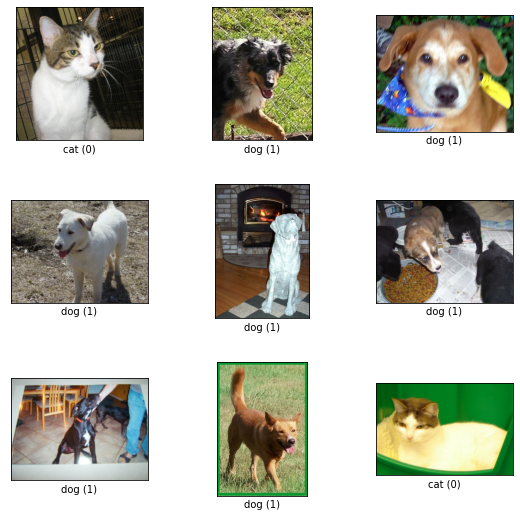

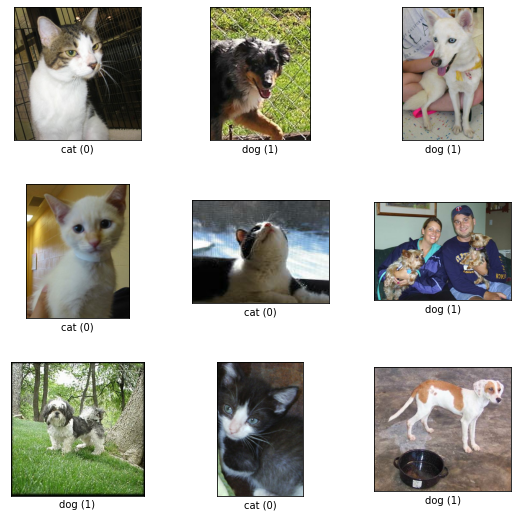

In [ ]:
fig = tfds.show_examples(ds_train, ds_info)

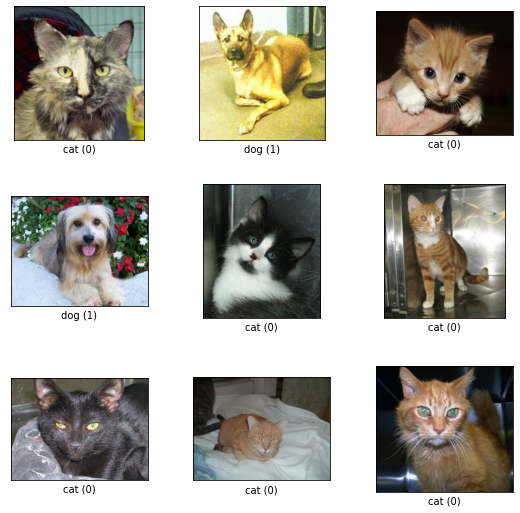

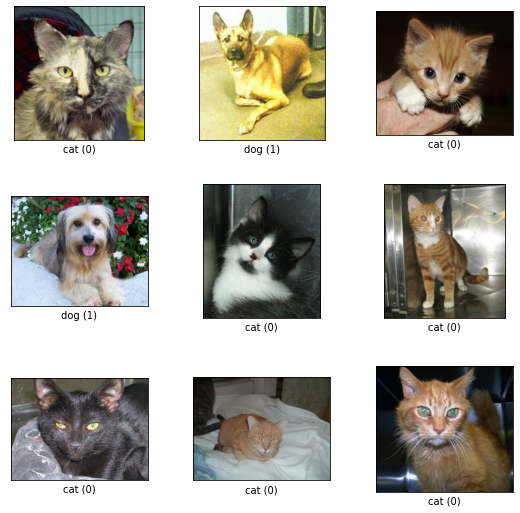

In [ ]:
fig = tfds.show_examples(ds_test, ds_info)

**normalize**

In [ ]:
def normalize_and_resize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    image = tf.image.resize(image, (224,224))
    image = tf.cast(image, tf.float32) / 255.
    return image, label

In [ ]:
def apply_normalize_on_dataset(ds, is_test=False, batch_size=16):
    ds = ds.map(
        normalize_and_resize_img, 
        num_parallel_calls=1
    )
    ds = ds.batch(batch_size)
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

**1) ResNet Í∏∞Î≥∏ Î∏îÎ°ù Íµ¨ÏÑ±ÌïòÍ∏∞**

ResNet-34ÏôÄ ResNet-50ÏùÄ Î™®Îëê conv blockÏù¥ÎùºÍ≥† Î∂àÎ¶¨Îäî Î∏îÎ°ù Íµ¨Ï°∞Î•º Í∞ÅÍ∞Å 3, 4, 6, 3Í∞úÏî© Î∞òÎ≥µÌï¥ÏÑú ÏåìÏùÄ ÌòïÌÉúÎùºÎäî Í≥µÌÜµÏ†êÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏäµÎãàÎã§. Í∑∏Îü¨ÎÇò ResNet-34ÏôÄ ResNet-50Ïùò Î∏îÎ°ù ÎÇ¥Î∂Ä Íµ¨ÏÑ±ÏùÄ ÏïΩÍ∞Ñ Îã§Î¶ÖÎãàÎã§. ResNet-34Ïùò Í≤ΩÏö∞ BlockÏùÄ 3x3 kernelÏù∏ Convolution layerÎ°úÎßå Íµ¨ÏÑ±ÎêòÏñ¥ÏûàÏßÄÎßå, ResNet-50ÏùÄ 1x1 ConvolutionÏù¥ ÏïûÎí§Î°ú Î∂ôÏñ¥ Îçî ÎßéÏùÄ Î†àÏù¥Ïñ¥Î•º Ìïú Î∏îÎ°ù ÎÇ¥Ïóê Í∞ÄÏßÄÍ≤å Îê©ÎãàÎã§.

In [ ]:
def conv_block(input_layer, 
               channel, 
               kernel_size, 
               strides=1, 
               activation='relu'):
    
    x = keras.layers.Conv2D(filters=channel,
                            kernel_size=kernel_size,
                            kernel_initializer='he_normal',
                            kernel_regularizer=keras.regularizers.l2(1e-4),
                            padding='same',
                            strides=strides
                           )(input_layer)
    
    x = keras.layers.BatchNormalization()(x)
    
    if activation:
        x = keras.layers.Activation(activation)(x)
    
    return x

In [ ]:
def build_resnet_block(input_layer, 
                       num_cnn=3, 
                       channel=64, 
                       block_num=0, 
                       is_50=True): # is_50 : resnet 50ÏùÑ ÏÇ¨Ïö©Ìï†ÏßÄ ÏïàÌï†ÏßÄÎ•º Ï†ïÌïòÎäî bool Î≥ÄÏàò
    
    x = input_layer
    
    # ResNet-50
    if is_50:
        for i in range(num_cnn):
            if i == 0:
                shortcut = conv_block(x, channel*4, (1,1), strides=2, activation=None)
                x = conv_block(x, channel, (1,1), strides=2)
                x = conv_block(x, channel, (3,3))
                x = conv_block(x, channel*4, (1,1), activation=None)
            else:
                shortcut = x
                x = conv_block(x, channel, (1,1))
                x = conv_block(x, channel, (3,3))
                x = conv_block(x, channel*4, (1,1), activation=None)
            
            x = keras.layers.Add()([x, shortcut])
            x = keras.layers.Activation('relu')(x)
    
    # ResNet-34
    else:
        for i in range(num_cnn):
            if block_num > 0 and i == 0:
                shortcut = conv_block(x, channel, (1,1), strides=2, activation=None)
                x = conv_block(x, channel, (3,3), strides=2)
                x = conv_block(x, channel, (3,3), activation=None)
            else:
                shortcut = x
                x = conv_block(x, channel, (3,3))
                x = conv_block(x, channel, (3,3), activation=None)
            
            x = keras.layers.Add()([x, shortcut])
            x = keras.layers.Activation('relu')(x)
    

    return x

**2) ResNet-34, ResNet-50 Complete Model**

In [ ]:
def build_resnet(input_shape=(32,32,3),
                 num_cnn_list=[3,4,6,3],
                 channel_list=[64,128,256,512],
                 num_classes=10, 
                 is_50=True, 
                 activation='softmax',
                 name='ResNet_50'):
    
    assert len(num_cnn_list) == len(channel_list) # Î™®Îç∏ÏùÑ ÎßåÎì§Í∏∞ Ï†ÑÏóê config listÎì§Ïù¥ Í∞ôÏùÄ Í∏∏Ïù¥Ïù∏ÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§.
    
    input_layer = keras.layers.Input(shape=input_shape)  # input layerÎ•º ÎßåÎì§Ïñ¥Îë°ÎãàÎã§.
    
    # first layer
    x = conv_block(input_layer, 64, (7,7), strides=2)
    x = keras.layers.MaxPool2D(pool_size=(2,2), strides=2)(x)
    
    # config listÎì§Ïùò Í∏∏Ïù¥ÎßåÌÅº Î∞òÎ≥µÌï¥ÏÑú Residual block Î∏îÎ°ùÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
    for block_num, (num_cnn, channel) in enumerate(zip(num_cnn_list, channel_list)):
        x = build_resnet_block(x, 
                               num_cnn=num_cnn, 
                               channel=channel, 
                               block_num=block_num, 
                               is_50=is_50)
        
    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dense(num_classes, 
                           activation=activation, 
                           kernel_initializer='he_normal'
                          )(x)
    
    model = keras.Model(inputs=input_layer, outputs=x, name=name)
    
    return model

**ResNet-34**


In [ ]:
resnet_34 = build_resnet(input_shape=(32, 32,3), is_50=False)
resnet_34.summary()

Model: "ResNet_50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 16, 16, 64)   9472        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 16, 16, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 16, 16, 64)   0           ['batch_normalization[0][

**ResNet-50**


In [ ]:
resnet_50 = build_resnet(input_shape=(32, 32,3), is_50=True)
resnet_50.summary()

Model: "ResNet_50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_36 (Conv2D)             (None, 16, 16, 64)   9472        ['input_2[0][0]']                
                                                                                                  
 batch_normalization_36 (BatchN  (None, 16, 16, 64)  256         ['conv2d_36[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_33 (Activation)     (None, 16, 16, 64)   0           ['batch_normalization_36[

**3) ÏùºÎ∞ò ÎÑ§Ìä∏ÏõåÌÅ¨(plain network) ÎßåÎì§Í∏∞**

Î∏îÎ°ù ÏΩîÎìú ÏàòÏ†ïÌïòÍ∏∞
 ResNetÏùò ÌïµÏã¨ ÏïÑÏù¥ÎîîÏñ¥Îäî skip connectionÍ≥º residual networkÍ∏∞ ÎïåÎ¨∏Ïóê, ResNetÏùò Ìö®Í≥ºÎ•º Î≥¥Ïó¨Ï£ºÍ∏∞ ÏúÑÌï¥ÏÑúÎäî skip connectionÏù¥ ÏóÜÎäî ÏùºÎ∞ò ÎÑ§Ìä∏ÏõåÌÅ¨(plain net)Í∞Ä ÌïÑÏöîÌï©ÎãàÎã§.


In [ ]:
def build_plain_block(input_layer, 
                      num_cnn=3, 
                      channel=64, 
                      block_num=0, 
                      is_50=True):
    
    x = input_layer
    
    # plain-50
    if is_50:
        for i in range(num_cnn):
            if block_num > 0 and i == 0:
                x = conv_block(x, channel, (1,1), strides=2)
                x = conv_block(x, channel, (3,3))
                x = conv_block(x, channel*4, (1,1))
            else:
                x = conv_block(x, channel, (1,1))
                x = conv_block(x, channel, (3,3))
                x = conv_block(x, channel*4, (1,1))
    
    # plain-34
    else:
        for i in range(num_cnn):
            if block_num > 0 and i == 0:
                x = conv_block(x, channel, (3,3), strides=2)
                x = conv_block(x, channel, (3,3))
            else:
                x = conv_block(x, channel, (3,3))
                x = conv_block(x, channel, (3,3))

    return x

In [ ]:
def build_plainnet(input_shape=(32,32,3), 
                   num_cnn_list=[3,4,6,3],
                   channel_list=[64,128,256,512],
                   num_classes=10,
                   is_50=True, 
                   activation='softmax',
                   name='Plain_50'):
    
    assert len(num_cnn_list) == len(channel_list)
    
    input_layer = keras.layers.Input(shape=input_shape)
    
    # first layer
    x = conv_block(input_layer, 64, (7,7), strides=2)
    x = keras.layers.MaxPool2D(pool_size=(2,2), strides=2)(x)
    
    # config listÎì§Ïùò Í∏∏Ïù¥ÎßåÌÅº Î∞òÎ≥µÌï¥ÏÑú plain block Î∏îÎ°ùÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
    for block_num, (num_cnn, channel) in enumerate(zip(num_cnn_list, channel_list)):
        x = build_plain_block(x, 
                              num_cnn=num_cnn, 
                              channel=channel,
                              block_num=block_num,
                              is_50=is_50)
    
    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dense(num_classes, 
                           activation=activation,
                           kernel_initializer='he_normal'
                          )(x)
    
    model = keras.Model(inputs=input_layer, outputs=x, name=name)
    
    return model

**4) ResNet-50 vs Plain-50 ÎòêÎäî ResNet-34 vs Plain-34**

**Ablation Study**
 ResNetÏùÄ ÎßéÏùÄ Î†àÏù¥Ïñ¥ÏôÄ PoolingÏùÑ Í±∞ÏπòÎØÄÎ°ú CIFAR-10ÏóêÏÑúÎäî Ïò§Î≤ÑÌîºÌåÖ(overfitting)ÏúºÎ°ú Ïûò ÎèôÏûëÌïòÏßÄ ÏïäÏùÑ Ïàò ÏûàÏäµÎãàÎã§. Î†àÏù¥Ïñ¥Í∞Ä ÎßéÍ≥† ÌïôÏäµÌï¥Ïïº Ìï† Î≥ÄÏàò(parameter)Í∞Ä ÎßéÏùÄ Îç∞ ÎπÑÌï¥, Îç∞Ïù¥ÌÑ∞ ÏàòÍ∞Ä ÎßéÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏. 224x224 ÌîΩÏÖÄ ÌÅ¨Í∏∞Ïùò Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ï∞æÏïÑÏÑú Ïã§Ìóò

In [ ]:
BATCH_SIZE = 32
EPOCH = 5

In [ ]:
ds_train = apply_normalize_on_dataset(ds_train, batch_size=BATCH_SIZE)
ds_test = apply_normalize_on_dataset(ds_test, batch_size=BATCH_SIZE)

In [ ]:
plain_34 = build_plainnet(input_shape=(224, 224, 3), 
                          num_classes=1, 
                          is_50=False, 
                          activation='sigmoid',
                          name='Plain_34')

plain_34.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy'],
)

history_plain_34 = plain_34.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[80%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


581/581 [==============================] - 10215s 18s/step - loss: 1.6939 - accuracy: 0.5265 - val_loss: 1.3677 - val_accuracy: 0.4985
Epoch 2/5
581/581 [==============================] - ETA: 0s - loss: 1.1091 - accuracy: 0.5643 

In [ ]:
resnet_34 = build_resnet(input_shape=(224, 224, 3),                                
                               num_classes=1, 
                               is_50=False, 
                               activation='sigmoid', 
                               name='ResNet_34')

resnet_34.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy'],
)

history_resnet_34 = resnet_34.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[80%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


581/581 [==============================] - 86s 127ms/step - loss: 1.9622 - accuracy: 0.6205 - val_loss: 1.5665 - val_accuracy: 0.6145
Epoch 2/5
581/581 [==============================] - 73s 126ms/step - loss: 1.1210 - accuracy: 0.7180 - val_loss: 6.3938 - val_accuracy: 0.4905
Epoch 3/5
581/581 [==============================] - 73s 126ms/step - loss: 0.7774 - accuracy: 0.7731 - val_loss: 0.9692 - val_accuracy: 0.6028
Epoch 4/5
581/581 [==============================] - 73s 127ms/step - loss: 0.6041 - accuracy: 0.8222 - val_loss: 0.9482 - val_accuracy: 0.7004
Epoch 5/5
581/581 [==============================] - 73s 126ms/step - loss: 0.5096 - accuracy: 0.8505 - val_loss: 0.8021 - val_accuracy: 0.7263


In [ ]:
plain_50 = build_plainnet(input_shape=(224, 224, 3), 
                          num_classes=1, 
                          is_50=True,
                          activation='sigmoid')

plain_50.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy'],
)

history_plain_50 = plain_50.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[80%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


581/581 [==============================] - 114s 172ms/step - loss: 3.6032 - accuracy: 0.5083 - val_loss: 2.6730 - val_accuracy: 0.5063
Epoch 2/5
581/581 [==============================] - 98s 169ms/step - loss: 2.1764 - accuracy: 0.5381 - val_loss: 1.8668 - val_accuracy: 0.5058
Epoch 3/5
581/581 [==============================] - 99s 170ms/step - loss: 1.7052 - accuracy: 0.5092 - val_loss: 1.7245 - val_accuracy: 0.4896
Epoch 4/5
581/581 [==============================] - 99s 170ms/step - loss: 1.4694 - accuracy: 0.5003 - val_loss: 1.3918 - val_accuracy: 0.4806
Epoch 5/5
581/581 [==============================] - 99s 170ms/step - loss: 1.3073 - accuracy: 0.5160 - val_loss: 110252.2344 - val_accuracy: 0.5167


In [ ]:
resnet_50 = build_resnet(input_shape=(224, 224, 3), 
                         num_classes=1, 
                         is_50=True,
                         activation='sigmoid')

resnet_50.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy'],
)

history_resnet_50 = resnet_50.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[80%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


581/581 [==============================] - 77s 108ms/step - loss: 5.1514 - accuracy: 0.6358 - val_loss: 4.1552 - val_accuracy: 0.6532
Epoch 2/5
581/581 [==============================] - 62s 106ms/step - loss: 3.1846 - accuracy: 0.7367 - val_loss: 2.7781 - val_accuracy: 0.6093
Epoch 3/5
581/581 [==============================] - 62s 106ms/step - loss: 2.0865 - accuracy: 0.7835 - val_loss: 1.8160 - val_accuracy: 0.7608
Epoch 4/5
581/581 [==============================] - 62s 107ms/step - loss: 1.4936 - accuracy: 0.8208 - val_loss: 1.7289 - val_accuracy: 0.6550
Epoch 5/5
581/581 [==============================] - 62s 107ms/step - loss: 1.1430 - accuracy: 0.8542 - val_loss: 1.1260 - val_accuracy: 0.8201


**ÏãúÍ∞ÅÌôî**
ÌïôÏäµÏùÑ ÌÜµÌï¥ ÎßåÎì§Ïñ¥ÏßÑ historyÎ•º matplotlibÎ°ú ÏãúÍ∞ÅÌôîÌïòÏó¨ Îëê Î™®Îç∏Ïùò Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ(validation accuracy)ÏôÄ Í≤ÄÏ¶ù ÏÜêÏã§(validation loss)Ïù¥ Ïñ¥ÎñªÍ≤å Îã§Î•∏ÏßÄ ÏÇ¥Ìé¥Î¥ÖÏãúÎã§.

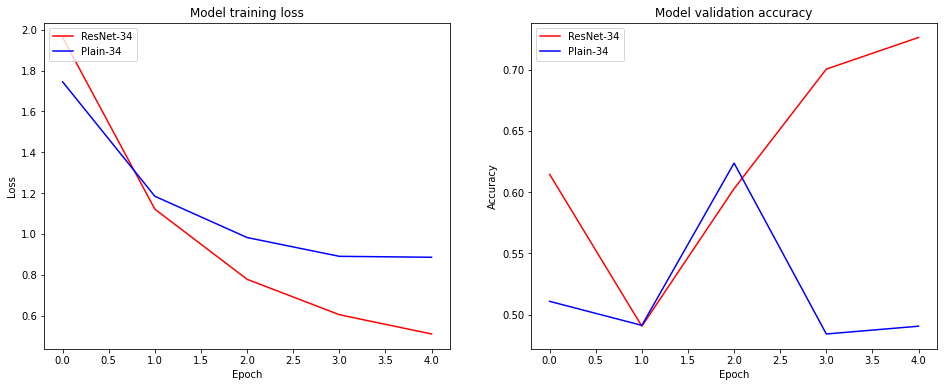

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history_resnet_34.history['loss'],'r')
plt.plot(history_plain_34.history['loss'],'b')
plt.title('Model training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['ResNet-34', 'Plain-34'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_resnet_34.history['val_accuracy'], 'r')
plt.plot(history_plain_34.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['ResNet-34', 'Plain-34'], loc='upper left')
plt.show()

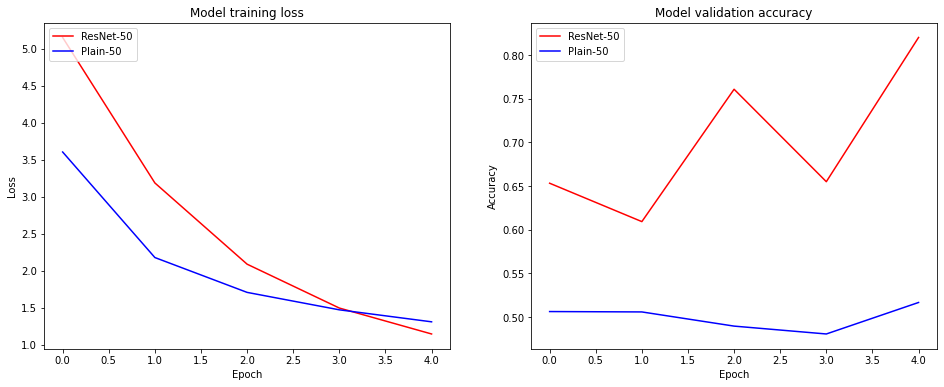

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history_resnet_50.history['loss'],'r')
plt.plot(history_plain_50.history['loss'],'b')
plt.title('Model training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['ResNet-50', 'Plain-50'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_resnet_50.history['val_accuracy'], 'r')
plt.plot(history_plain_50.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['ResNet-50', 'Plain-50'], loc='upper left')
plt.show()

### trial and error

epochsÎ•º 5Î°ú Ïû°ÏùÄ Í≤ÉÏπòÍ≥§ ÎßåÏ°±Ïä§Îü¨Ïö¥ Í≤∞Í≥ºÍ∞Ä ÎÇòÏôîÎã§. ÎπÑÎ°ù Ï¥àÎ∞òÏóê GPU ÏÑ§Ï†ïÎèÑ Ïïà ÌïòÍ≥† ÏãúÍ∞Ñ Î≥¥ÎÇ¥Í≥† Ïù¥ÌõÑÏóî Ï∂©Ï†ÑÍ∏∞ Ïó∞Í≤∞ÏùÑ ÌïòÏßÄ ÏïäÏùÄ Ï±ÑÎ°ú ÎèåÎ†§ÏÑú Î∞∞ÌÑ∞Î¶¨Í∞Ä ÎØ∏Ïπú ÏÜçÎèÑÎ°ú Îã§Îäî Í≤ΩÌóòÏùÑ ÌñàÏßÄÎßå Í∑∏ÎßåÌÅº Îã§ÏùåÎ≤àÏóî Îçî ÏïàÏ†ïÎêú ÏÉÅÌÉúÏóêÏÑú Ïã§ÌñâÌï† Ïàò ÏûàÏùÑ Í≤É Í∞ôÎã§. Í∑∏ÎèôÏïà ÎåÄÎ∂ÄÎ∂ÑÏùò Î™®Îç∏ÏùÑ Í≤ΩÌóòÌñàÎã§ ÏÉùÍ∞ÅÌïòÎäîÎç∞ Íµ¨ÌòÑÏùÄ Îòê Îã§Î•∏ Î¨∏Ï†úÏù∏ Í≤É Í∞ôÎã§. ÎÖºÎ¨∏ÏùÑ ÏûêÏÑ∏Ìûà ÏùΩÍ≥† ÌïòÎÇòÌïòÎÇò ÌååÏïÖÏùÄ ÌñàÏßÄÎßå ÏßÅÏ†ë ÏΩîÎìúÎ•º Ïì¥Îã§Îäî Í±¥ Îçî Îä•Î†•Ïù¥ ÌïÑÏöîÌïú ÏòÅÏó≠ Í∞ôÎã§. ÏßÑÏßú ÎÇ¥ ÌîÑÎ°úÏ†ùÌä∏Î•º Ìï¥Î≥º ÎÇ†Ïù¥ Í∏∞ÎåÄÎêúÎã§. Í∑∏ÎïåÎäî Ïò§Î°úÏßÄ ÎÇ¥ Ïã§Î†•Í≥º ÎèôÎ£åÎì§Ïùò Ïã§Î†•ÏúºÎ°ú Íµ¨ÌòÑÌïú Î©ãÏßÑ ÏΩîÎìúÏòÄÏúºÎ©¥ Ï¢ãÍ≤†Í≥† Ïò¨Ìï¥ ÏµúÍ≥†Ïùò Î∞∞ÏõÄÏù¥ Îê† Í≤É Í∞ôÎã§.